## **Airline Prices Prediction**
**Objective**
• DOMAIN : Aviation Industry
• CONTEXT : An airline company is introducing a number of flights across various routes as part of its new strategy. The company wants to
build a machine learning model which can help the company to predict the flights’ prices using various parameters
• DATA DESCRIPTION : The data set contains information on various flights and their prices:
1. Parameters: Airline, source, destination, duration, total stops etc.
2. Price: Price of the flight

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install scikit-learn
#!pip install scikeras
!pip install scikit-learn==1.1.3

#### Import the data

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")


In [ ]:
adata = pd.read_excel('/content/drive/MyDrive/AIML/projects/NeuralNetworks/AddlProj/Data.xlsx')

In [ ]:
adata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# check the shape of the data
adata.shape

(10682, 11)

#### Check for duplicate values

In [ ]:
adata.duplicated().sum()

220

In [ ]:
adata.drop_duplicates(inplace=True)

In [ ]:
adata.duplicated().sum()

0

#### check for missing values

In [ ]:
adata.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
# percentage of missing values for each attribute
(adata.isna().sum()/len(adata))*100

,0
Airline,0.000000
Date_of_Journey,0.000000
Source,0.000000
Destination,0.000000
Route,0.009558
Dep_Time,0.000000
Arrival_Time,0.000000
Duration,0.000000
Total_Stops,0.009558
Additional_Info,0.000000


In [ ]:
# Let's remove missing values in the data
adata.dropna(inplace=True)
round(adata.isnull().sum() / adata.isnull().count() * 100, 2)

,0
Airline,0.0
Date_of_Journey,0.0
Source,0.0
Destination,0.0
Route,0.0
Dep_Time,0.0
Arrival_Time,0.0
Duration,0.0
Total_Stops,0.0
Additional_Info,0.0


#### Observations:
Route and Total_stops have missing values 1 each.

In [ ]:
# check for data types and data statistics
adata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10461 non-null  object
 1   Date_of_Journey  10461 non-null  object
 2   Source           10461 non-null  object
 3   Destination      10461 non-null  object
 4   Route            10461 non-null  object
 5   Dep_Time         10461 non-null  object
 6   Arrival_Time     10461 non-null  object
 7   Duration         10461 non-null  object
 8   Total_Stops      10461 non-null  object
 9   Additional_Info  10461 non-null  object
 10  Price            10461 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.7+ KB


In [ ]:
# check for statistics on data
adata.describe()

,Price
count,10461.000000
mean,9027.257432
std,4624.823766
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12346.000000
max,79512.000000


##### Converting column types appropriatesly

##### changing durationn column to show up as integer value

In [ ]:
data = adata.copy(deep=True)
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10681,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
#adata["Duration"].apply(lambda x: int(x.split('h')[0])*60 + int(x.split('h')[1].split('m')[0]) if 'h' in x else int(x.split('m')[0]))
def convert_duration_to_minutes(duration):
  """Converts duration string to minutes.

  Args:
    duration: Duration string in the format 'xh ym' or 'ym'.

  Returns:
    Duration in minutes as an integer.
  """
  try:
    if 'h' in duration:
      if 'm' in duration:
        #print(duration)
        duration= int(duration.split('h')[0])*60 + int(duration.split('h')[1].split('m')[0])
        #print(duration)
      else:
        duration= int(duration.split('h')[0])*60
    else:
      duration =  int(duration.split('m')[0])
  except ValueError:
    # Handle cases where duration format is unexpected
    print(f"Warning: Invalid duration format '{duration}'. Returning 0.")
    return 0
  return duration
data["Duration"]= data["Duration"].apply(convert_duration_to_minutes)

In [ ]:
# change duration column type to integer
data["Duration"] = data["Duration"].astype(int)

In [ ]:
#adata['Total_Stops'].unique()
print(data[data['Total_Stops'].isna()])
#data.head()
data[(data['Airline']=='Air India') & (data['Source']== 'Delhi') & (data['Destination']=='Cochin') & (data['Duration'] >= 1400) & (data["Duration"] <1450)]


Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
251,Air India,1/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,19:15 02 Jun,1410,2 stops,No info,10651
672,Air India,21/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,19:15 22 Mar,1410,2 stops,No info,8236
1336,Air India,9/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 10 Mar,1420,2 stops,No info,10660
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,1420,1 stop,No info,7480
1679,Air India,3/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 04 Jun,1420,2 stops,No info,10975
1786,Air India,15/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,19:15 16 Jun,1410,2 stops,No info,9653
1862,Air India,27/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Jun,1420,2 stops,No info,10975
2343,Air India,15/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 16 May,1420,2 stops,No info,10975
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,1420,1 stop,No info,7480
2589,Air India,15/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,19:15 16 May,1410,2 stops,No info,11491


In [ ]:
# Missing value treatment: As seen above mostly 2 stops are present for duration 1420 for missing value in total_stops
data['Total_Stops'] = data['Total_Stops'].fillna("2 stops")

In [ ]:
## As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
data['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)


#### Let us create integer columns out of Date of Journey

In [ ]:
# Let us create integer columns out of Date of Journey
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_min,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,170,0,No info,3897,1,10,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,445,2,No info,7662,13,15,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,1140,2,No info,13882,4,25,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,325,1,No info,6218,23,30,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,285,1,No info,13302,21,35,1,3,2019


In [ ]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)


In [ ]:
data["Airline"].value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1694
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


#### Univariate and Bivariate analysis

In [ ]:
data.describe()

,Duration,Total_Stops,Price,Arrival_hour,Arrival_min,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.0,10461.000000,10461.000000
mean,629.823153,0.802313,9027.257432,13.387439,24.720390,13.463914,4.701654,2019.0,12.478444,24.406844
std,500.704931,0.660638,4624.823766,6.855827,16.571178,8.467583,1.163739,0.0,5.727499,18.815661
min,5.000000,0.000000,1759.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000
25%,170.000000,0.000000,5224.000000,8.000000,10.000000,6.000000,3.000000,2019.0,8.000000,5.000000
50%,505.000000,1.000000,8266.000000,14.000000,25.000000,12.000000,5.000000,2019.0,11.000000,25.000000
75%,910.000000,1.000000,12346.000000,19.000000,35.000000,21.000000,6.000000,2019.0,18.000000,40.000000
max,2860.000000,4.000000,79512.000000,23.000000,55.000000,27.000000,6.000000,2019.0,23.000000,55.000000


<Axes: xlabel='Price', ylabel='Count'>

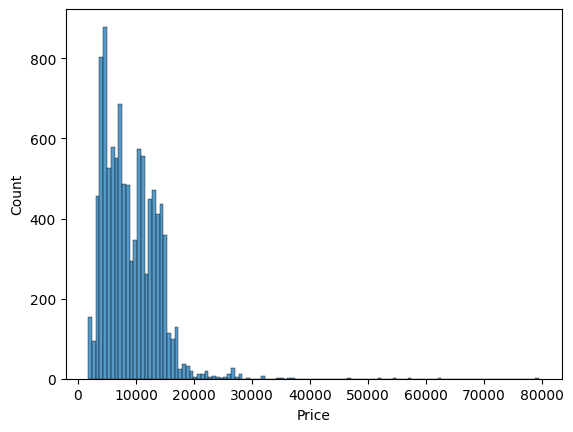

In [ ]:
# Check the distribution of target variable :Price: Looks to be normal distribution with right skew
sns.histplot(data['Price'])

<Axes: xlabel='Duration', ylabel='Count'>

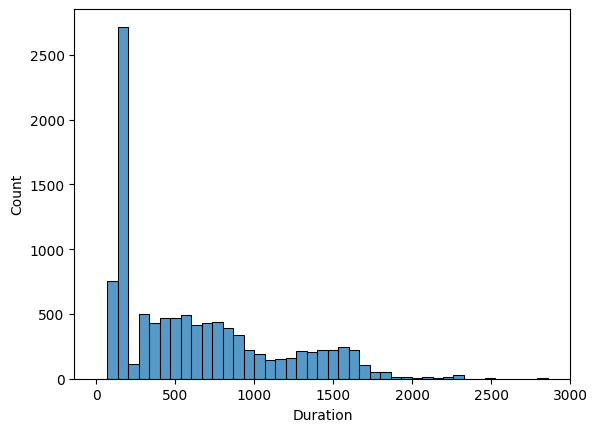

In [ ]:
sns.histplot(data['Duration'])

<Axes: ylabel='Duration'>

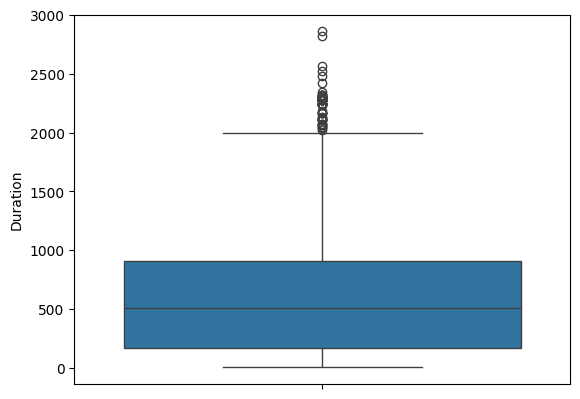

In [ ]:
sns.boxplot(data['Duration'])

<Axes: ylabel='Total_Stops'>

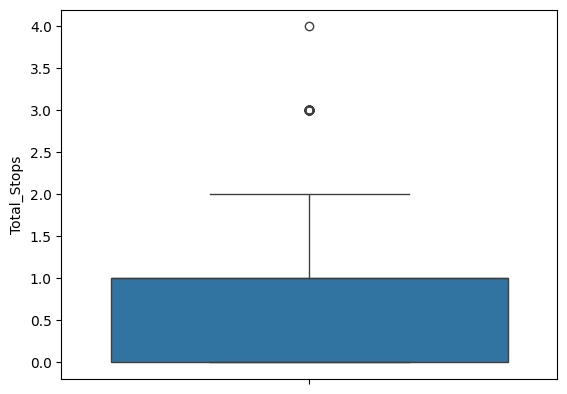

In [ ]:
sns.boxplot(data['Total_Stops'])

#### Bivariate Analysis

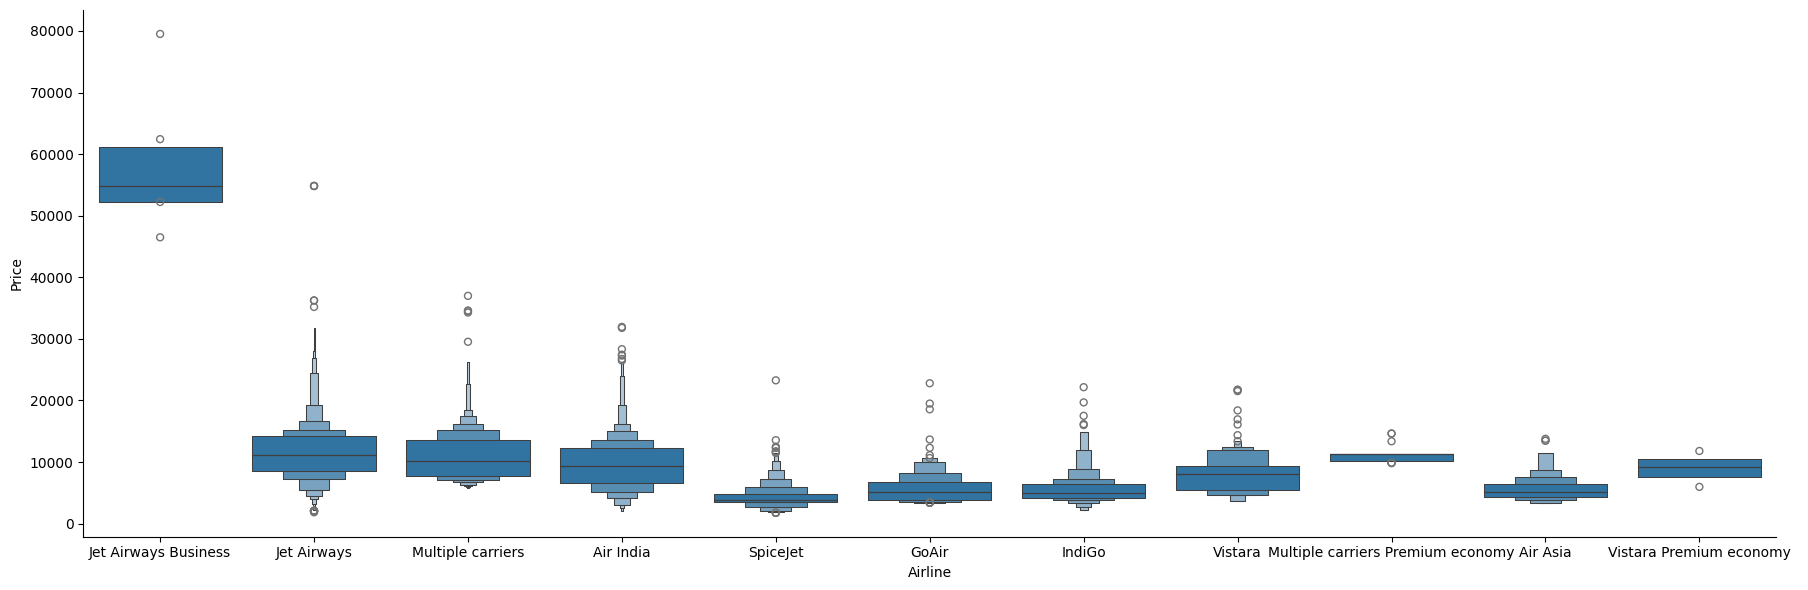

In [ ]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### Corelation Matrix

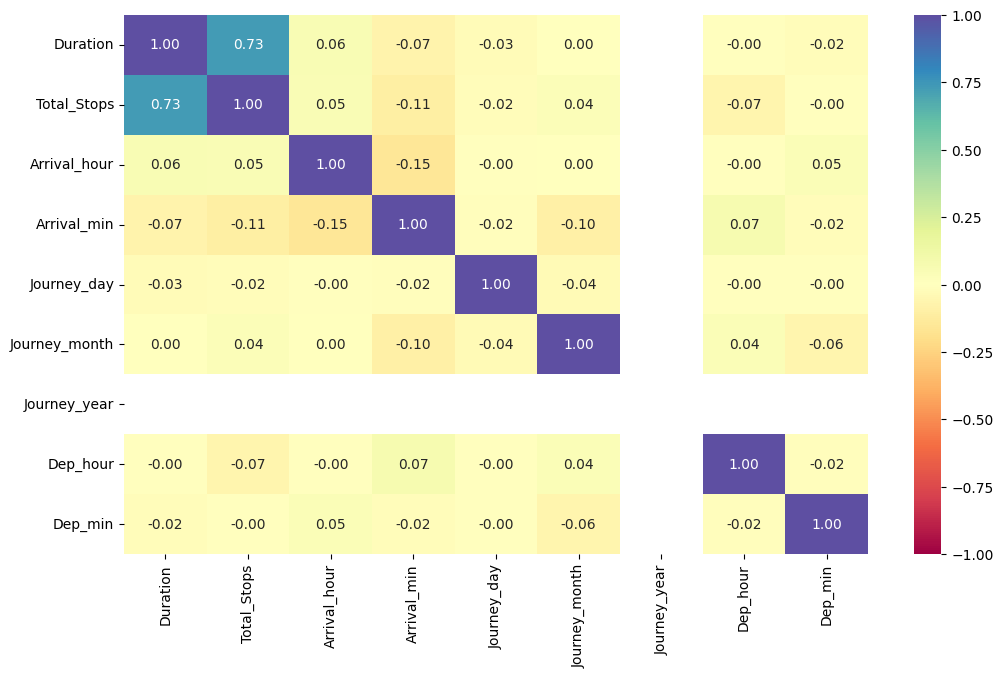

In [ ]:
num_cols_list = data.select_dtypes(include=np.number).columns.tolist()
num_cols_list.remove('Price')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

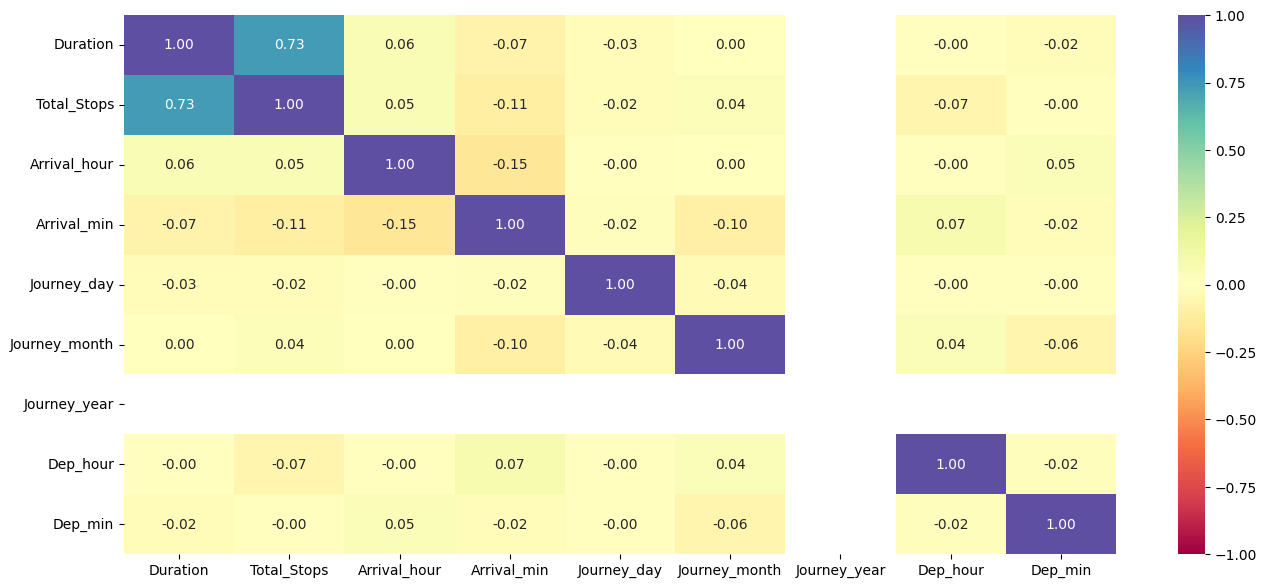

In [ ]:
num_cols_list = data.select_dtypes(include=np.number).columns.tolist()
num_cols_list.remove('Price')

plt.figure(figsize=(16, 7))
sns.heatmap(
    data[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True,dtype=int)

#pd.to_numeric(Airline)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [ ]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True,dtype=int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True,dtype=int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data = pd.concat([data, Airline, Source, Destination], axis = 1)

In [ ]:
data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
data.dtypes

,0
Duration,int64
Total_Stops,int64
Price,int64
Arrival_hour,int32
Arrival_min,int32
Journey_day,int32
Journey_month,int32
Journey_year,int32
Dep_hour,int32
Dep_min,int32


#### Insights from the data

1.  From graph we can see that Jet Airways Business have the highest Price.
2. Apart from the first Airline almost all are having similar median
3. Duration and Total_stops are highly +vely correlated
4. Journey month and Arrival month are positively correlated
5. Arrival month and Duration are positively correlated

### Data Preprocessing

In [ ]:
#Split the data into X & Y: for Train,Val,Test split of 70:20:10
tdata = data.drop('Price', axis=1)
target = data['Price']

X_train, X_test_val,y_train, y_test_val = train_test_split(tdata, target, test_size=0.3, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_test_val, y_test_val, test_size=0.33, random_state=42)

In [ ]:
#Normalization
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Model Training and evaluation using Neural Networks**

In [ ]:
print('Number of examples: ', data.shape[0])
print('Number of features for each example: ', data.shape[1])
print('Shape of actual prices data: ', data['Price'].shape)

Number of examples:  10461
Number of features for each example:  29
Shape of actual prices data:  (10461,)


In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [93]:
# Initializing the ANN
model = Sequential()

model.add(Dense(64,activation  = 'relu',input_dim =28))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [94]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_133 (Dense)                    │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=32,verbose=1)

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7993560.5000 - val_loss: 155444048.0000
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7851965.0000 - val_loss: 150254080.0000
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7619404.5000 - val_loss: 144589792.0000
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7495849.5000 - val_loss: 143457856.0000
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7352426.0000 - val_loss: 141695872.0000
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7287187.0000 - val_loss: 139537088.0000
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7174575.5000 - val_loss: 141594144.0000
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7129932.0000 - val_loss: 150769824.0000
Epoch 9/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7039033.5000 - val_loss: 148663424.0000
Epoch 10/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6933796.0000 - val_loss: 139222464.0000

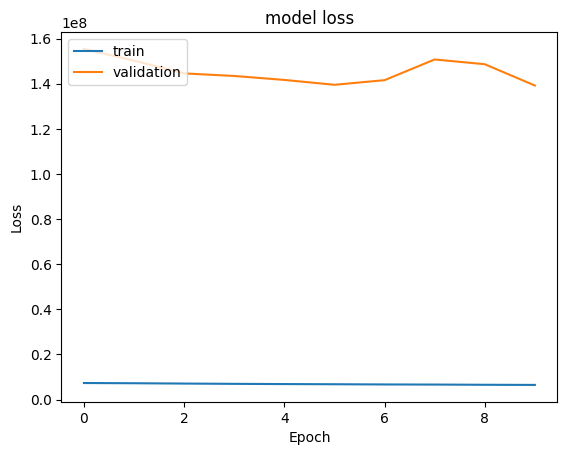

In [113]:
#Plotting Train Loss vs Validation Loss
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
plot_loss(history)

In [97]:
y_pred = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [98]:
y_test = np.array(y_test)
y_test[0],y_pred[0]

(10262, array([11825.167], dtype=float32))

#### **Performance Improvement of the model**

In [118]:
def create_model_v5(lr):
    np.random.seed(1337)
    model = Sequential()
    #model.add(tf.keras.layers.BatchNormalization(input_shape=(28,)))
    model.add(Dense(128,activation='relu',input_dim = 28))
    model.add(Dense(64,activation='relu'))
    #model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dense(128,activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1, activation='relu'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'mean_squared_error')
    return model

In [125]:
history=[]
lr=[0.001,0.05,0.01,0.02]
for i in range(len(lr)):
  model = create_model_v5(lr[i])
  history.append( model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split = 0.2))

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 92276504.0000 - val_loss: 12396554.0000
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9625317.0000 - val_loss: 10535423.0000
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8603483.0000 - val_loss: 9523425.0000
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8041832.0000 - val_loss: 8676302.0000
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7583752.0000 - val_loss: 7988405.0000
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7210409.0000 - val_loss: 7502416.0000
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6933804.5000 - val_loss: 7203070.5000
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6744804.0000 - val_loss: 7034965.5000
Epoch 9/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6613589.5000 - val_loss: 6936327.0000
Epoch 10/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6516230.5000 - val_loss: 6871472.5000
Epoch 1/10
184/1

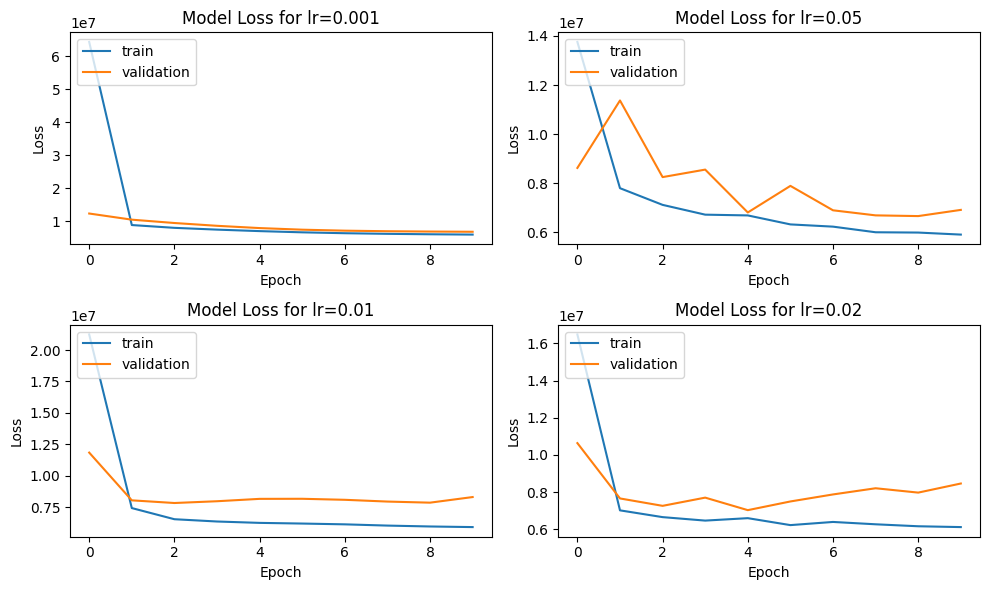

In [126]:
#fig, axs = plt.subplots(1, 3)
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Creating a 2x2 grid
axs = axs.flatten()  # Flattening the grid for easy iteration

for i in range(len(history)):
  axs[i].plot(history[i].history['loss'])
  axs[i].plot(history[i].history['val_loss'])
  axs[i].set_title('Model Loss for lr=' + str(lr[i])) # Setting title with lr value
  axs[i].set_ylabel('Loss')
  axs[i].set_xlabel('Epoch')
  axs[i].legend(['train', 'validation'], loc='upper left')

plt.tight_layout()  # Adjusting subplot parameters for a tight layout
plt.show()

### **Observations in the model after finetuning the hyperparameters and changing architecture**
1.Before finetuning there is a huge gap between training and validation loss which looks like model overfits. After finutuning , the gap is significantly reduced.<br>
2.Model converges at learning_rate=0.05 better.


## **Used Car Price Prediction**

### **Objective: To build a regression model using Neural Networks that predicts the price of used car**

### **Data Import and Exploration**

#### **Reading data and importing libraries**

In [127]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
# Install required libraries
#!pip install scikit-learn
#!pip install scikeras
!pip install scikit-learn==1.1.3

In [129]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [181]:
cdata = pd.read_csv('/content/drive/MyDrive/AIML/projects/NeuralNetworks/AddlProj/usedcars.csv')

In [182]:
cdata.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Gray,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2011,SE,17500,8367,White,AUTO


In [183]:
# check the shape of the data
cdata.shape

(150, 6)

#### **check for duplicate values**

In [184]:
cdata.duplicated().sum()

0

#### **check for missing values**

In [185]:
cdata.isna().sum()

,0
year,0
model,0
price,0
mileage,0
color,0
transmission,0


#### **Data overview**

In [186]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


In [187]:
cdata.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.973333,12961.933333,44260.646667
std,1.483451,3122.481735,26982.104322
min,2006.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2011.000000,21992.000000,151479.000000


In [188]:
cdata.tail()

,year,model,price,mileage,color,transmission
145,2006,SES,6200,95000,Silver,AUTO
146,2006,SE,5995,87003,Red,AUTO
147,2006,SE,5980,96841,Red,AUTO
148,2006,SE,4899,151479,Gray,AUTO
149,2006,SE,3800,109259,Red,AUTO


In [189]:
# Observe unique categorical values of the text columns
print(cdata['model'].unique())
print(cdata['color'].unique())
print(cdata['transmission'].unique())

['SEL' 'SE' 'SES']
['Gray' 'Silver' 'White' 'Blue' 'Black' 'Red']
['AUTO' 'MANUAL']


#### **Uni and Bivariate Analysis**

<Axes: xlabel='price', ylabel='Density'>

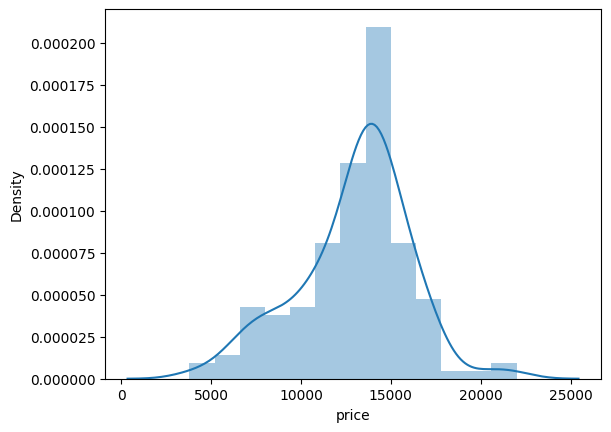

In [190]:
sns.distplot(cdata['price'])

<Axes: ylabel='price'>

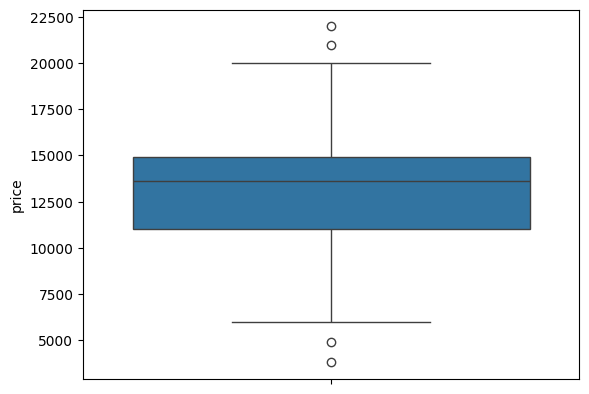

In [191]:
sns.boxplot(cdata['price'])

In [192]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [193]:
def showPie(cdata,coln):
  fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Creating a 2x2 grid
  axs = axs.flatten()  # Flattening the grid for easy iteration

  for i in range(len(coln)):
    labels=cdata[coln[i]].unique()
    sizes = cdata[coln[i]].value_counts()
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    #plt.show()

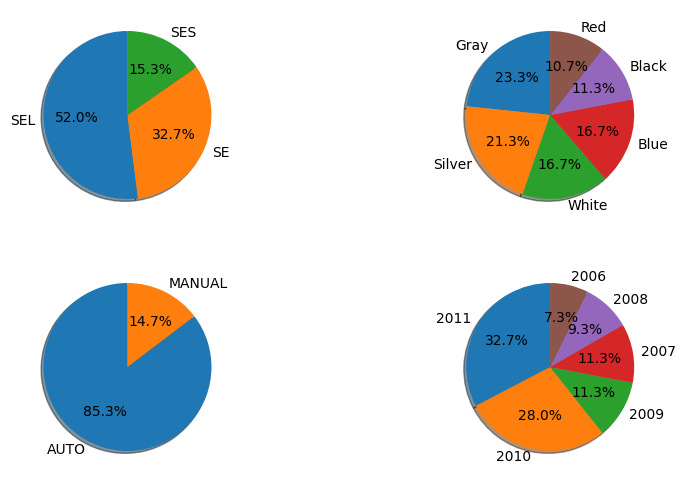

In [194]:
showPie(cdata,['model','color','transmission','year'])

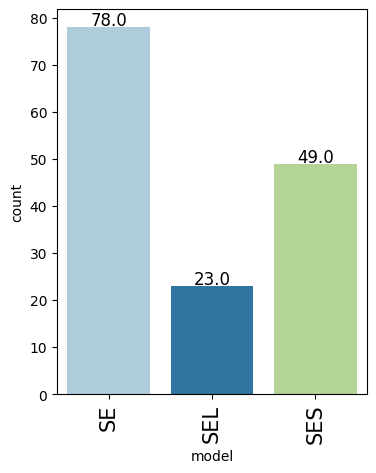

In [195]:
labeled_barplot(cdata, "model")

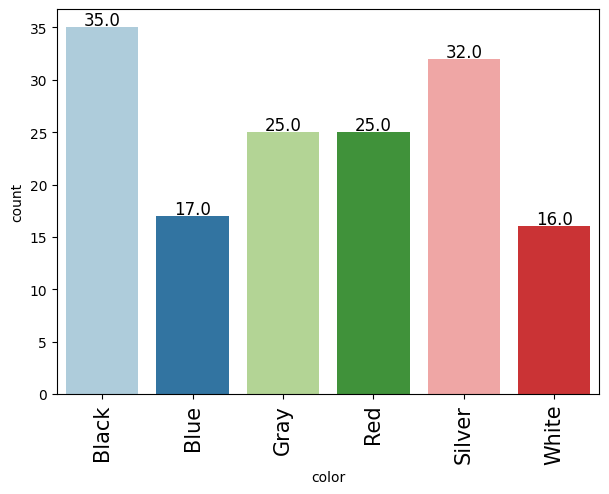

In [196]:
labeled_barplot(cdata, "color")

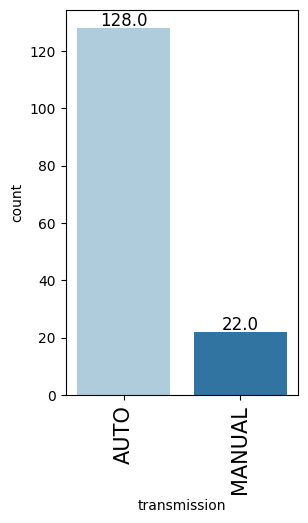

In [197]:
labeled_barplot(cdata, "transmission")

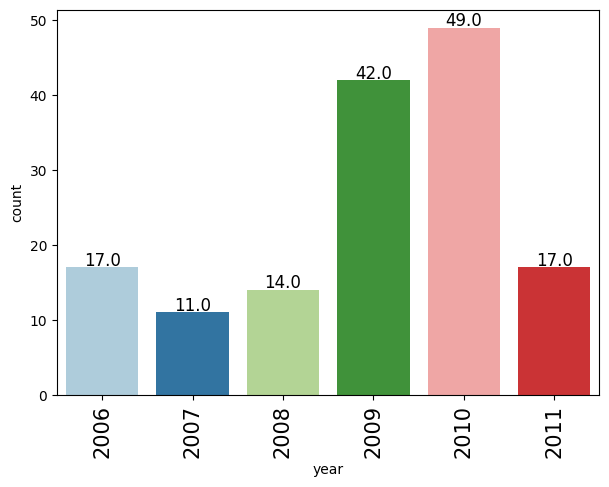

In [198]:
labeled_barplot(cdata, "year")

#### **Observations from Uni and Bivariate Analysis**
1. The used cars price is normally distribted
2. No Significant outliers in the price data
3. Median of the prices stands around 13000.
4. As shown in Pie charts SE model has a higher share of ~52%.
5. Autotransmission models have overwhelmingly higher share of 85%
6. The colors of the cars are  distributed without much difference.
7. The years 2011 and 2010 saw higher share of sales


### **Data Preprocessing**

#### **Converting categorical features to Numerical features**

In [200]:
# As model is Nominal Categorical data we will perform OneHotEncoding

modl = cdata[["model"]]

modl = pd.get_dummies(modl,dtype=int)
modl.head()

,model_SE,model_SEL,model_SES
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [201]:
# As model is Nominal Categorical data we will perform OneHotEncoding

trans = cdata[["transmission"]]

trans = pd.get_dummies(trans,dtype=int)
trans.head()

,transmission_AUTO,transmission_MANUAL
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [202]:
# As model is Nominal Categorical data we will perform OneHotEncoding

clr = cdata[["color"]]

clr = pd.get_dummies(clr,dtype=int)
clr.head()

,color_Black,color_Blue,color_Gray,color_Red,color_Silver,color_White
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1


In [203]:
cdata=pd.concat([cdata,modl,trans,clr],axis=1)

In [204]:
cdata.drop(["model", "color", "transmission"], axis = 1, inplace = True)

In [205]:
cdata.head()

,year,price,mileage,model_SE,model_SEL,model_SES,transmission_AUTO,transmission_MANUAL,color_Black,color_Blue,color_Gray,color_Red,color_Silver,color_White
0,2011,21992,7413,0,1,0,1,0,0,0,1,0,0,0
1,2011,20995,10926,0,1,0,1,0,0,0,1,0,0,0
2,2011,19995,7351,0,1,0,1,0,0,0,0,0,1,0
3,2011,17809,11613,0,1,0,1,0,0,0,1,0,0,0
4,2011,17500,8367,1,0,0,1,0,0,0,0,0,0,1


In [206]:
#checking Correlation of the data
correlation = cdata.corr()
correlation.loc['price']

,price
year,0.871181
price,1.000000
mileage,-0.806149
model_SE,-0.254118
model_SEL,0.430384
model_SES,-0.059945
transmission_AUTO,0.101527
transmission_MANUAL,-0.101527
color_Black,0.062558
color_Blue,0.083709


In [210]:
cdata.shape

(150, 14)

<Axes: >

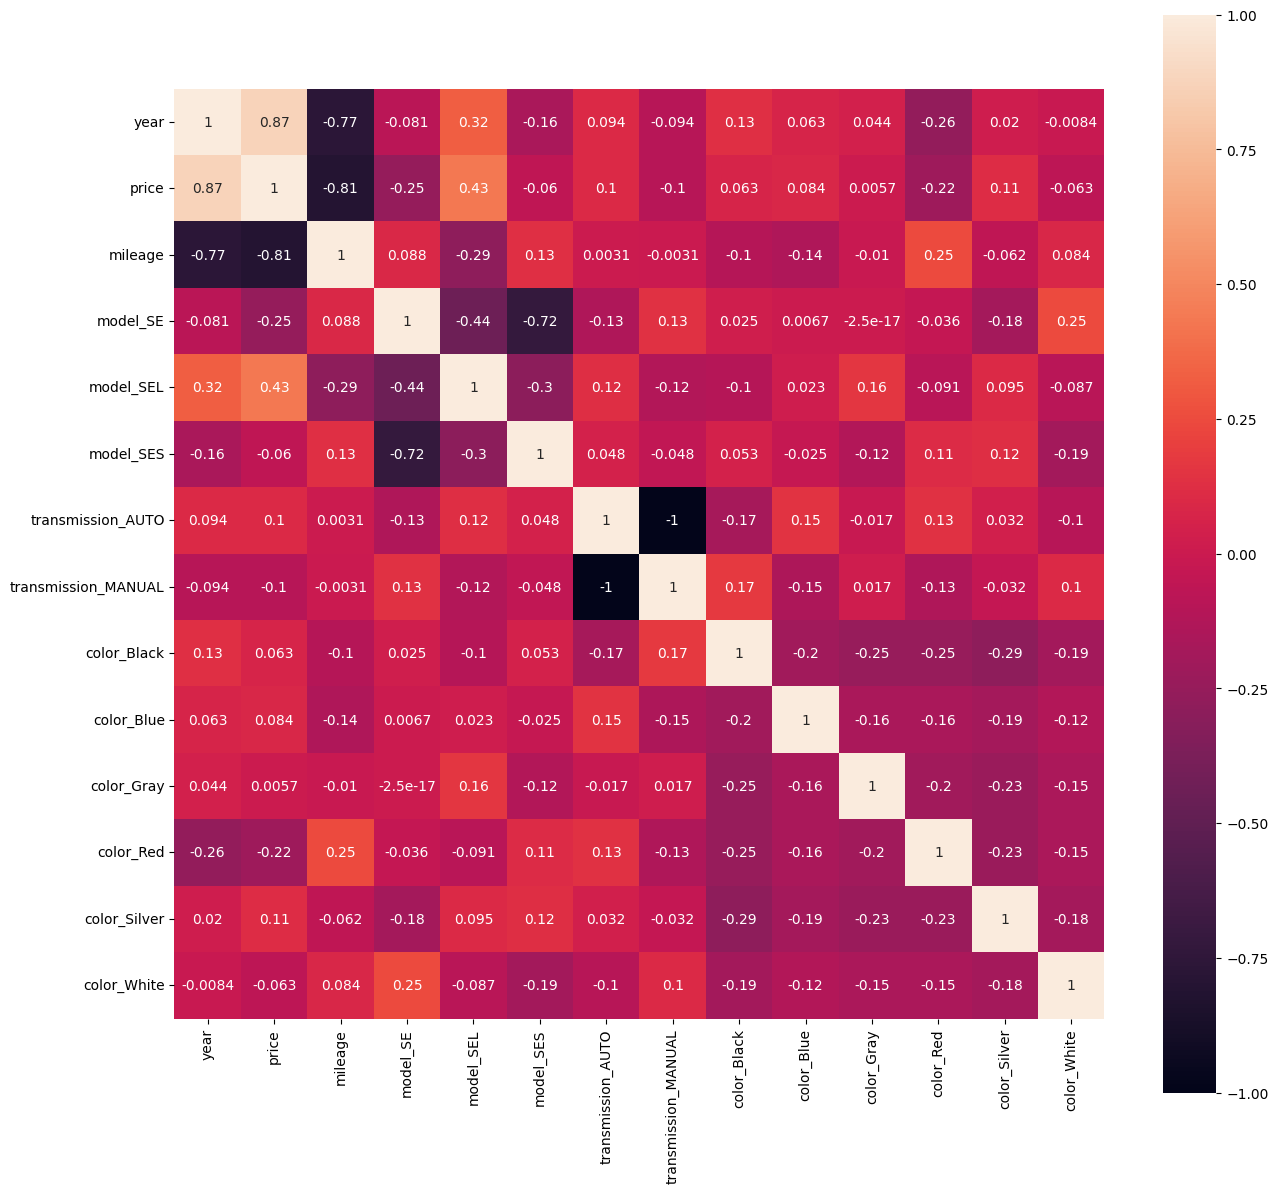

In [207]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,14))
sns.heatmap(correlation,square = True,annot = True)

#### **Split data into X, Y Train and Test data**

In [208]:
#Split the data into X & Y: for Train,Val,Test split of 70:20:10
tdata = cdata.drop('price', axis=1)
target = cdata['price']

X_train, X_test,y_train, y_test = train_test_split(tdata, target, test_size=0.2, random_state=42)


#### **Normalization**

In [209]:
#Normalization
#Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
X_train = mc.fit_transform(X_train)
X_test = mc.transform(X_test)

### **Model Training ,Evaluation using Neural Network**

In [215]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Normalize input data
model.add(tf.keras.layers.BatchNormalization(input_shape=(13,)))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='relu'))

# Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(1))

In [221]:
# Compile the model - add mse as loss and stochastic gradient descent as optimizer
model.compile(optimizer='sgd', loss='mse')

In [225]:
hist = model.fit(X_train, y_train, epochs=10,batch_size=32,verbose=1,validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - loss: 11543357.0000 - val_loss: 12413387.0000
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11353181.0000 - val_loss: 12394165.0000
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 11184988.0000 - val_loss: 12385880.0000
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 11036255.0000 - val_loss: 12386773.0000
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 10904746.0000 - val_loss: 12395309.0000
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 10788476.0000 - val_loss: 12410160.0000
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 10685697.0000 - val_loss: 12430177.0000
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 10594853.0000 - val_loss: 12454368.0000
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 10514570.0000 - val_loss: 12481875.0000
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 10443632.0000 - val_loss: 12511963.0000


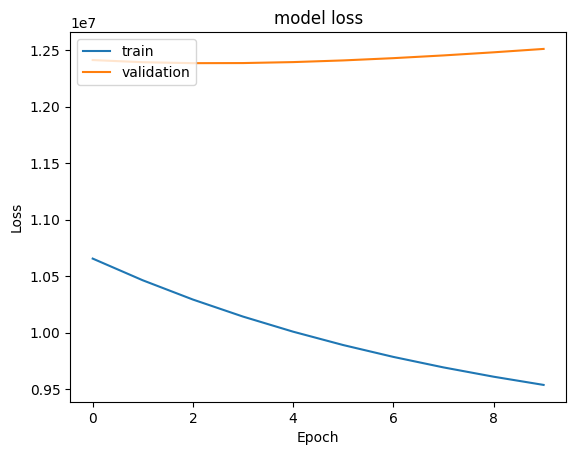

In [226]:
plot_loss(hist)

In [227]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


In [229]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3005.1643165050564


#### **Observations**
1.The training and validation losses are very high<br>
2.The gap between Training and validation losses is also very high


#### **Performance Improvement of the model**

In [243]:
def create_model_v6(lr):
    np.random.seed(24)
    model = Sequential()
    model.add(tf.keras.layers.BatchNormalization(input_shape=(13,)))
    model.add(Dense(256,activation='relu',input_dim = 13))
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))

    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dense(128,activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='relu'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'mean_squared_error')
    return model

In [244]:
model.summary()

Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_59               │ (None, 13)                  │              52 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_411 (Dense)                    │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_412 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_161 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_413 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_162 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_414 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_415 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_416 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,189 (555.43 KB)

 Trainable params: 47,387 (185.11 KB)

 Non-trainable params: 26 (104.00 B)

 Optimizer params: 94,776 (370.22 KB)

In [251]:
histor=[]
lr=[0.06,0.05,0.01,0.02]
for i in range(len(lr)):
  model = create_model_v6(lr[i])
  histor.append( model.fit(X_train,y_train,batch_size=32,epochs=30,verbose=1,validation_split = 0.2))
  print("-------------------------------------------------------------------------------------------")

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - loss: 171486256.0000 - val_loss: 13778148.0000
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 20779056.0000 - val_loss: 19451632.0000
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 13806330.0000 - val_loss: 18818278.0000
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7247745.0000 - val_loss: 23633058.0000
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4478718.0000 - val_loss: 25291016.0000
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4437176.5000 - val_loss: 14586564.0000
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 5322246.0000 - val_loss: 12390392.0000
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 4304957.5000 - val_loss: 18171960.0000
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 2497203.5000 - val_loss: 19366714.0000
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3004210.0000 - val_loss: 15264195.0000
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━

#### **Visualization: Training loss, validation loss vs number of epochs and for different learning rates**

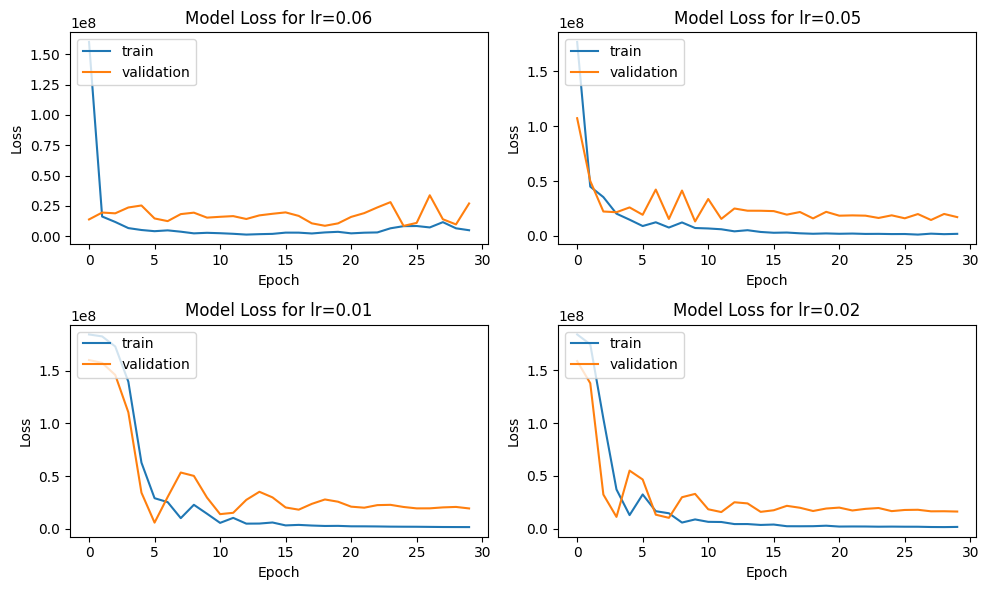

In [252]:
#fig, axs = plt.subplots(1, 3)
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Creating a 2x2 grid
axs = axs.flatten()  # Flattening the grid for easy iteration

for i in range(len(histor)):
  axs[i].plot(histor[i].history['loss'])
  axs[i].plot(histor[i].history['val_loss'])
  axs[i].set_title('Model Loss for lr=' + str(lr[i])) # Setting title with lr value
  axs[i].set_ylabel('Loss')
  axs[i].set_xlabel('Epoch')
  axs[i].legend(['train', 'validation'], loc='upper left')

plt.tight_layout()  # Adjusting subplot parameters for a tight layout
plt.show()

In [253]:
y_pred_ft = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [254]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_ft)))
print(rmse)

3870.3229247895206


#### **Observations on the model after finetuning the hyperparameters and changing architecture**
1.All of the graphs show the smooth convergence of learning rate in the range (0.01-0.08) showing the model is learning over the time , with increase in the no of epochs<br>
2.Model converges at learning_rate=0.02 better than other rates<br>
3.The Model loss is significantly lower compared to the loss before model was finetuned.